In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns


import sys
sys.path.append('../')
import RandomMatrix as RM

%matplotlib inline
sns.set()

np.random.seed(140)

# Joint Probability Density

The joint probability density of the eigenvalues (in no particular order) for an $N \times N$ gaussian ensemble with Dyson index $\beta$ is given by

$$f(\lambda_1, ... , \lambda_n) = \frac{1}{Z_{N,\beta}} e^{\left(-\frac{1}{2} \sum_{i=1}^N \lambda_i^2 \right)} \prod_{j<k} |\lambda_j - \lambda_k|^\beta $$

where 

$$Z_{N,\beta} = (2\pi)^{N/2} \prod_{k=1}^N \frac{\Gamma(1+k\frac{\beta}{2})}{\Gamma(1+ \frac{\beta}{2})}$$

The `RandomMatrix` package has this density implemented as the `gaussian_ensemble_density` function. Below we calculate the joint density of a $2 \times 2$ GOE ($\beta=1$) for eigenvalues $1$ and $-1$.

In [10]:
RM.gaussian_ensemble_density(np.array([1,-1]), 1)

0.10377687435514868

We can create a heatmap of the density. First for the sake of computational efficiency, we will create the joint density function for the special case of $2 \times 2$ Gaussian Ensembles.

In [11]:
def joint_density(λ1, λ2, beta):
    """
    The density for a beta gaussian ensemble of size 2x2
    """
    constant = (2*np.pi) * gamma(1+beta)/gamma(1+beta/2)
    return 1/constant * np.exp(-.5*(λ1**2 + λ2**2)) * abs(λ1-λ2)**beta

We can verify this function gives the same answer as the `RandomMatrix` package.

In [12]:
joint_density(1,-1, 1)

0.10377687435514868

Now we can use this function to create a heatmap for $\beta=1$.

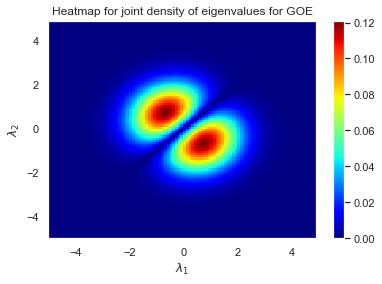

In [13]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

λ1,λ2 = np.meshgrid(x, y)
Z = joint_density(λ1, λ2, 1)
plt.pcolormesh(λ1,λ2, Z, cmap=plt.cm.jet)
plt.title("Heatmap for joint density of eigenvalues for GOE")
plt.xlabel("$\lambda_1$")
plt.ylabel("$\lambda_2$")
plt.colorbar();

# Emperical Experiment

We can create an emperical heatmap by generating GOEs and plotting a heatmap of it's eigenvalues.

In [14]:
λ0 = []
λ1 = []
for _ in range(100000):
    H = RM.Generate_GOE(2)
    λs, V = np.linalg.eig(H)
    λ0.append(λs[0])
    λ1.append(λs[1])

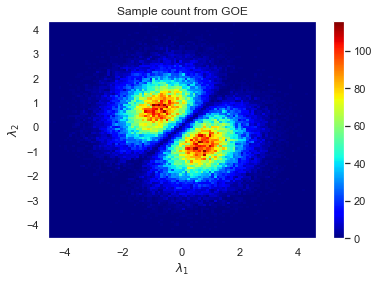

In [15]:
plt.xlabel("$\lambda_1$")
plt.ylabel("$\lambda_2$")
plt.title("Sample count from GOE")
plt.hist2d(λ0, λ1, bins=100, cmap=plt.cm.jet)
plt.colorbar();

We can try the same exercise for GUEs and plot the actual joint density next to the emperical one for comparison.

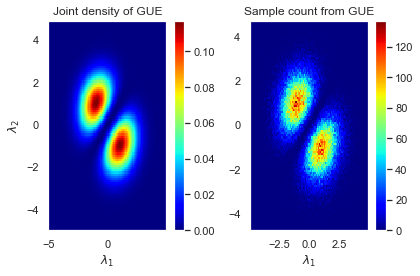

In [16]:
plt.subplot(1, 2, 1)
λ1,λ2 = np.meshgrid(x, y)
Z = joint_density(λ1, λ2, 2)
plt.xlabel("$\lambda_1$")
plt.ylabel("$\lambda_2$")
plt.title("Joint density of GUE")
plt.pcolormesh(λ1,λ2, Z, cmap=plt.cm.jet)
plt.colorbar()
plt.subplot(1, 2, 2)
λ0 = []
λ1 = []
for _ in range(100000):
    H = RM.Generate_GUE(2)
    λs, V = np.linalg.eig(H)
    λ0.append(λs[0].real)
    λ1.append(λs[1].real)
plt.xlabel("$\lambda_1$")
plt.title("Sample count from GUE")
plt.xlim(-5,5)
plt.hist2d(λ0, λ1, bins=100, cmap=plt.cm.jet)
plt.colorbar()
plt.tight_layout();

# $\beta$-Hermite Matrix

Ioana Dumitriu and Alan Edelman wrote an influencial paper *Matrix Models for Beta Ensembles* introduced a new method of sampling from Gaussian Ensembles. Define the $\beta$-Hermite matrix of size $n \times n$ as follows

$$ H_{\beta} \sim  \frac{1}{\sqrt{2}}
\begin{pmatrix}
N(0,2) & \chi_{(n-1)\beta} & 0 &  \cdots  & 0\\
\chi_{(n-1)\beta} & N(0,2) & \chi_{(n-2)\beta} & \cdots & 0 \\
0 & \chi_{(n-2)\beta} & N(0,2) & \ddots & 0 \\
\vdots  & \vdots  & \ddots & \ddots & \chi_{\beta}  \\
0 & 0 & \cdots & \chi_\beta & N(0,2) 
\end{pmatrix}
$$

The eigenvalues of this real, tridiagonal matrix is equal in distribution to the eigenvalues of the $\beta$-Gaussian ensemble. The `Generate_Hermite` function in the RandomMatrix library will sample a hermite matrix. If we wanted to sample eigenvalues from GUEs, we could generate a $2$-Hermite matrix and find its eigenvalues. Below we recreate the heatmap for the joint density of the eigenvalues for a $2 \times 2$ GUE using the `Generate_Hermite` function.

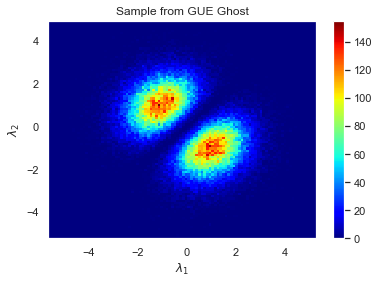

In [10]:
λ0 = []
λ1 = []
for _ in range(100000):
    H = Generate_Hermite(n=2, beta=2)
    λs, V = np.linalg.eig(H)
    λ0.append(λs[0])
    λ1.append(λs[1])
plt.xlabel("$\lambda_1$")
plt.ylabel("$\lambda_2$")
plt.title("Sample from GUE Ghost")
plt.hist2d(λ0, λ1, bins=100, cmap=plt.cm.jet)
plt.colorbar();

# Ghosts and Shadows

In *The Random Matrix Technique of Ghosts and Shadows*, Alan Edelman explains how the Gaussian ensemble can be studied in a more 'general' sense by allowing the Dyson index to be any positive, real number. This idea is very abstract when one realizes it doesn't make much sense to say that $\beta=1.5$ since that would imply the algebra has 1.5 dimension over the reals. This requires us to allow random matrix ensembles that can't be sampled. Edelman calls these objects **ghost random matrices**. A real or complex quantity from these ghosts that can be sampled or computed are called **shadows**. So although we can't sample ghosts, we can study their behavior through shadows. 

For example, if $G_1, G_2, G_3, G_4$ are iid standard normal variables then 

$$x_1 := G_1 \Rightarrow |x_1| = \sqrt{G_1^2} \sim \chi_1 $$

$$x_2 := G_1 + iG_2 \Rightarrow |x_2| = \sqrt{G_1^2 + G_2^2} \sim \chi_2$$

$$x_4 := G_1 + iG_2 + jG_3 + kG_4 \Rightarrow |x_4| = \sqrt{\sum_{i=1}^4 G_i} \sim \chi_{4}$$


Each of the $x_i$s above correspond to a one of the real division algebras ($\mathbb{R}, \mathbb{C}, \mathbb{H}$). Note that in all cases, $|x_\beta| = \chi_\beta$. If we wanted to define a ghost $x_\beta$ for any $\beta > 0$, we wouldn't be able to sample such an $x$ unless $\beta=1,2,4$ by the Frobenius theorem of real division algebras. We could however sample the shadow of $|x_\beta|$ by simply sampling from the $\chi_\beta$ distribution. This works beause the degrees of freedom parameter for the chi-distribution can be any strictly positive real number.

Note that if we wanted to study matrices of a $\beta$-Gaussian ensemble, we could use the $\beta$-Hermite matrix above as a shadow! So although it is impossible to sample a $\beta=1.5$ Gaussian matrix, we are able to sample its eigenvalues from its ghost. 